# Explore dataset with Pandas

## Fixture to run pandas on dataset

In [64]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from activreader import Activ


class RioPandas:
    def __init__(self):
        self._data = pd.read_csv('bigdemo.csv', delimiter='\t', names=Activ.PARAMS)

    @property
    def data(self):
        return self._data


## Show sample lines

In [65]:
rp = RioPandas()
rp.data

,ano1,idade1,sexo1,starttime,endtime,tipoescola,escola
0,9,17,M,2012-05-31 12:47:13.201761,NaN,publica,ufrj
1,9,17,F,2012-05-31 13:28:17.394373,NaN,publica,EBA UFRJ
2,5,17,M,2012-05-31 14:02:37.553638,2012-05-31 14:10:36.901706,publica,EE Raul Soares
3,6,9,M,2012-05-31 14:15:13.906770,NaN,privada,dfgdfgfg
4,9,16,M,2012-05-31 14:18:22.757682,NaN,publica,ufrj
...,...,...,...,...,...,...,...
1614,11,18,F,2012-11-21 03:37:05.985727,NaN,nenhuma,NaN
1615,11,0,F,2012-11-27 10:15:50.181396,NaN,nenhuma,NaN
1616,11,18,F,2012-11-28 01:16:33.189498,NaN,nenhuma,NaN
1617,11,18,F,2012-11-29 14:30:29.913191,NaN,nenhuma,NaN


## Select private schools

In [66]:
rp.data[rp.data.tipoescola == "privada"]

,ano1,idade1,sexo1,starttime,endtime,tipoescola,escola
3,6,9,M,2012-05-31 14:15:13.906770,NaN,privada,dfgdfgfg
5,5,14,M,2012-05-31 14:18:24.340084,NaN,privada,UFRJ
9,9,17,M,2012-05-31 14:36:09.036254,NaN,privada,info
30,2,7,M,2012-06-03 08:51:32.290063,2012-06-03 09:02:05.565398,privada,Joao
39,3,10,F,2012-06-05 10:20:09.484702,NaN,privada,Escola
...,...,...,...,...,...,...,...
1323,2,11,M,2012-10-17 08:58:36.008626,NaN,privada,escola municipal alfredo valladão
1329,2,7,M,2012-10-17 09:15:11.836389,2012-10-17 09:42:30.774275,privada,Maria Raythe
1332,4,10,M,2012-10-17 09:31:39.207284,2012-10-17 09:39:24.168801,privada,maria raythe
1333,4,10,M,2012-10-17 09:40:59.222183,2012-10-17 09:44:32.608088,privada,Maria Raythe


## Show age and scholar year averages

In [67]:
rp.data.groupby(['sexo1', 'tipoescola'])[['ano1', 'idade1']].mean()

ano1     idade1
sexo1 tipoescola                      
F     nenhuma     10.046875  14.593750
      privada      4.438819   9.780591
      publica      5.985685  12.314928
M     nenhuma      9.148936  16.276596
      privada      4.046205   9.429043
      publica      4.993737  11.252610

## Show averages against school type

In [68]:
rp.data.pivot_table('ano1', index='sexo1', columns='tipoescola')

tipoescola,nenhuma,privada,publica
sexo1,,,
F,10.046875,4.438819,5.985685
M,9.148936,4.046205,4.993737


## Count students in age bins

In [69]:
rp.data.groupby(['sexo1', 'tipoescola', 'ano1'])[['idade1']].count()

idade1
sexo1 tipoescola ano1        
F     nenhuma    0          2
                 1          1
                 5          3
                 6          1
                 9          1
...                       ...
M     publica    7         27
                 8         40
                 9         28
                 10        11
                 11        30

[61 rows x 1 columns]

## Show fitting age to school years

In [70]:
rp.data.pivot_table('idade1', index=['sexo1', 'tipoescola'], columns='ano1')

ano1                    0         1          2         3          4    
sexo1 tipoescola                                                       
F     nenhuma     1.500000  1.000000        NaN       NaN        NaN  \
      privada     4.235294  6.258065   7.428571  8.642857   8.976190   
      publica     3.666667  9.305556   8.166667  8.848101  10.074074   
M     nenhuma     6.400000       NaN  10.000000  8.000000        NaN   
      privada     5.500000  6.120000   7.727273  7.969697   9.258065   
      publica     4.625000  6.794118   8.333333  9.366667  10.068493   

ano1                     5          6          7          8          9    
sexo1 tipoescola                                                          
F     nenhuma     11.333333  18.000000        NaN        NaN  16.000000  \
      privada     10.062500  11.476190  12.157895  13.857143  14.461538   
      publica     10.730769  11.645161  12.285714  13.300000  16.086957   
M     nenhuma     14.000000        NaN        NaN        NaN        NaN   
      privada     10.325581  10.900000  12.300000  12.750000  15.937500   
      publica     11.507692  12.129032  12.629630  14.050000  15.892857   

ano1                     10         11  
sexo1 tipoescola                        
F     nenhuma     17.500000  15.230769  
      privada     16.833333  17.888889  
      publica     16.650000  17.909091  
M     nenhuma     17.888889  18.000000  
      privada     16.200000  18.000000  
      publica     16.636364  17.966667

In [71]:
rp.data.pivot_table('idade1',index=['sexo1', 'tipoescola'], columns='escola')

escola              Marília de Dirceu   ALBERTO DE CAMPOS   
sexo1 tipoescola                                            
F     privada                     NaN                 NaN  \
      publica                    10.0                 NaN   
M     privada                     NaN                 NaN   
      publica                     NaN                10.0   

escola             E M duque de caxias orneres   alvaro moreyra   
sexo1 tipoescola                                                  
F     privada                              NaN              NaN  \
      publica                              NaN              7.0   
M     privada                              NaN              NaN   
      publica                              8.0              NaN   

escola             ciep e  presidente samora machel   colegio cruzeiro   
sexo1 tipoescola                                                         
F     privada                                   NaN                NaN  \
      publica                                  10.0                NaN   
M     privada                                   NaN                9.0   
      publica                                   NaN                NaN   

escola             favinho e mel   municipal diogo feijo  .pedro II  .~~.ç   
sexo1 tipoescola                                                             
F     privada                NaN                     NaN        NaN   11.0  \
      publica                NaN                     NaN        6.0    NaN   
M     privada                5.0                     NaN        NaN    NaN   
      publica                NaN                    10.0        NaN    NaN   

escola            ...  vicente jannuzzi  vicente mariano  vilaescola   xxx   
sexo1 tipoescola  ...                                                        
F     privada     ...               NaN              NaN         NaN   7.0  \
      publica     ...               NaN              NaN         NaN  16.0   
M     privada     ...               NaN              NaN         9.0   NaN   
      publica     ...              17.0             13.0         NaN   NaN   

escola            yanca e luiz fernando  yxmFE   yyu   
sexo1 tipoescola                                       
F     privada                       NaN    NaN  17.0  \
      publica                      10.0    9.0   NaN   
M     privada                       NaN    NaN   NaN   
      publica                       NaN    NaN   NaN   

escola            zelita      rocha     de            azevedo   
sexo1 tipoescola                                                
F     privada                                             NaN  \
      publica                                             7.0   
M     privada                                             NaN   
      publica                                             NaN   

escola            |Wendell Albert & Flavio Monteiro _||_|  Ítalo Zappa  
sexo1 tipoescola                                                        
F     privada                                         NaN          NaN  
      publica                                         NaN          NaN  
M     privada                                        14.0          NaN  
      publica                                         NaN          8.0  

[4 rows x 841 columns]

## Scatter plot age to school year fit

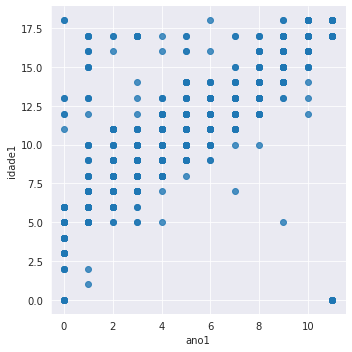

In [75]:
import seaborn as sns

df = RioPandas().data
sns.lmplot(x='ano1', y='idade1', data=df, fit_reg=False)

<AxesSubplot:xlabel='ano1', ylabel='idade1'>

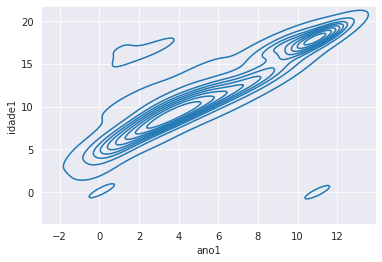

In [81]:
sns.kdeplot(x='ano1', y='idade1', data=df)
#sns.kdeplot(df.idade1)
#sns.kdeplot(df.ano1)

/home/anni/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anni/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 22.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anni/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anni/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anni/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning:

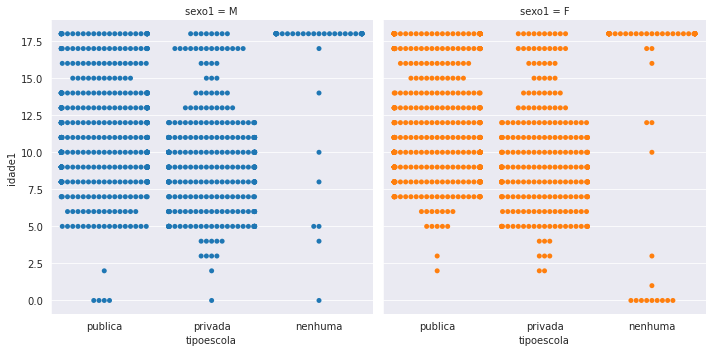

In [85]:
sns.catplot(x="tipoescola", y="idade1", hue="sexo1", col="sexo1",
            kind="swarm", data=df);

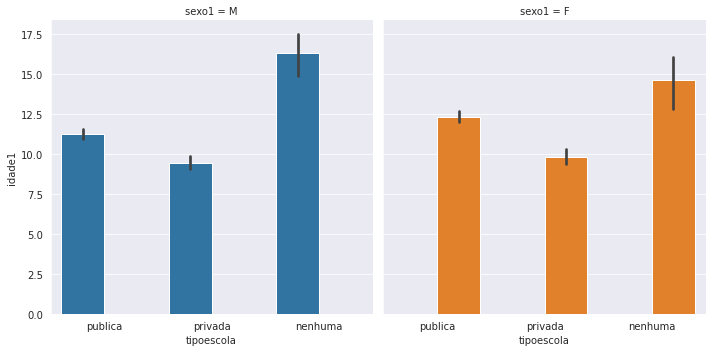

In [86]:
sns.catplot(x="tipoescola", y="idade1", hue="sexo1", col="sexo1",
            kind="bar", data=df);